In [1]:
import os
import numpy as np
import cv2

import dlib
import imutils
import matplotlib.pyplot as plt

#from werkzeug.utils import secure_filename
import face_validation.face_validation as fd
from face_validation import skin_tone as st
from face_validation import whitebalance_fix as wt

['Sheet1']
['200 172 153', '200 169 149', '197 166 145', '194 163 142', '190 157 134', '187 152 129', '182 146 121', '177 136 108', '168 127 100', '160 118 90', '148 108 81', '135 98 73', '119 87 65', '101 77 62', '203 171 153', '201 169 150', '200 167 147', '195 162 143', '190 156 135', '189 153 131', '181 146 123', '175 136 112', '169 129 103', '160 121 95', '152 111 84', '137 99 76', '121 89 69', '202 171 150', '200 169 148', '199 167 146', '194 163 143', '190 157 136', '186 153 130', '180 146 119', '176 137 110', '166 130 102', '155 119 93', '144 111 84', '132 99 73', '203 172 149', '199 169 146', '198 168 145', '194 164 141', '188 157 135', '185 153 128', '179 146 118', '173 139 111', '165 129 99', '153 121 93', '143 112 84', '201 173 149', '197 169 145', '196 168 144', '192 164 141', '189 159 135', '184 154 126', '177 145 117', '170 139 109', '163 130 100', '199 168 150', '199 166 148', '195 163 143', '191 159 140', '187 153 131', '183 146 123', '179 136 110', '171 129 103', '162

In [39]:
filepath = 'good_images/good_8.jpg'
img= cv2.cvtColor(cv2.imread(filepath), cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(cv2.imread(filepath), cv2.COLOR_BGR2GRAY)
image, rects = fd.detect_face(gray, cv2.imread(filepath))
print(rects)

rectangles[[(268, 110) (397, 239)]]


In [40]:
bbox = []
bbox.append(rects[0].left())
bbox.append(rects[0].top())
bbox.append(rects[0].right())
bbox.append(rects[0].bottom())
bbox

[268, 110, 397, 239]

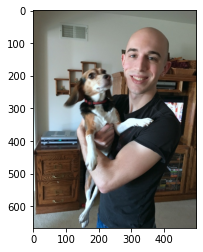

In [41]:
plt.imshow(cv2.cvtColor(cv2.imread(filepath), cv2.COLOR_BGR2RGB))

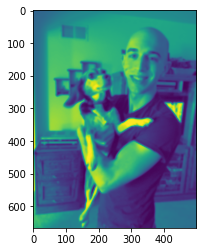

In [42]:
blurred = cv2.GaussianBlur(gray,(11,11),0)
plt.imshow(blurred)

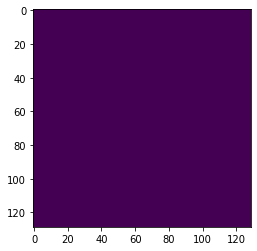

In [45]:
thresh = cv2.threshold(blurred, 220,255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh)
face_thresh = thresh[bbox[1]:bbox[3], bbox[0]:bbox[2]]
plt.imshow(face_thresh)

In [9]:
(np.sum(face_thresh == 255)/(np.sum(face_thresh==255)+np.sum(face_thresh==0)))*100

26.25556817189274

In [5]:
def detect_oexposure(filepath):
    bbox = []
    flag = 0
    #Load image
    image = cv2.imread(filepath)
    img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    
    #Detect Face
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    image, rects = fd.detect_face(gray, cv2.imread(filepath))
    #print(len(fd.detect_landmarks(rects,gray,image)))
    bbox.append(rects[0].left())
    bbox.append(rects[0].top())
    bbox.append(rects[0].right())
    bbox.append(rects[0].bottom())
    print(len(rects))
    
    #Blur and threshold
    blurred = cv2.GaussianBlur(gray,(11,11),0)
    thresh1 = cv2.threshold(blurred,220,255,cv2.THRESH_BINARY)[1]
    thresh2 = cv2.threshold(blurred,230,255,cv2.THRESH_BINARY)[1]
    face_thresh1 = thresh1[bbox[1]:bbox[3], bbox[0]:bbox[2]]
    face_thresh2 = thresh2[bbox[1]:bbox[3], bbox[0]:bbox[2]]
    
    #plot threshold map
    plt.imshow(face_thresh1)
    #print(np.sum(face_thresh == 0))
    white_pct1 = (np.sum(face_thresh1 == 255)/(np.sum(face_thresh1==255)+np.sum(face_thresh1==0)))*100
    white_pct2 = (np.sum(face_thresh2 == 255)/(np.sum(face_thresh2==255)+np.sum(face_thresh2==0)))*100
    
    if white_pct1>12 or white_pct2>7.0:
        flag = 1
    else:
        flag = 0

    return flag

1


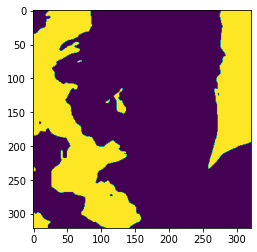

In [6]:
flag = detect_oexposure('odd_images/img_10.jpeg')

## Creating a face crop

81


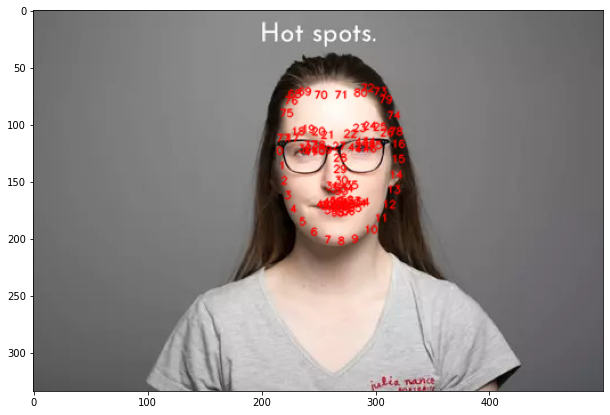

In [48]:
bbox = []
filepath = 'odd_images/img_9.jpg'
image = cv2.imread(filepath)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
image, rects = fd.detect_face(gray, cv2.imread(filepath))

bbox.append(rects[0].left())
bbox.append(rects[0].top())
bbox.append(rects[0].right())
bbox.append(rects[0].bottom())

landmarks = fd.detect_landmarks(rects,gray,image)
font = cv2.FONT_HERSHEY_SIMPLEX
print(len(landmarks))
for idx, point in enumerate(landmarks):
    #disp = cv2.circle(rgb_image,tuple(point),3,(255,0,0))
    disp = cv2.putText(rgb_image, str(idx), tuple(point), font, 0.3, (255, 0, 0), 1, cv2.LINE_AA)
plt.figure(figsize= (14,7))
plt.imshow(disp)

(321, 321, 3)


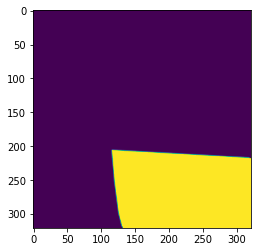

In [4]:
face_thresh1 = rgb_image[bbox[1]:bbox[3], bbox[0]:bbox[2]]
print(face_thresh1.shape)
mask = np.zeros((bbox[2]-bbox[0], bbox[3]- bbox[1]), dtype = 'uint8')
points = np.array(landmarks[0:17])
contours = cv2.drawContours(mask,[points],-1, (255,255,255), -1, cv2.LINE_AA)
#rect = cv2.boundingRect(points)
plt.imshow(contours)

In [5]:
lower_part = landmarks[0:17]
upper_part = np.array([landmarks[78],landmarks[74],landmarks[79], landmarks[73], landmarks[72], landmarks[80],landmarks[71], landmarks[70], landmarks[69], landmarks[68], landmarks[76],landmarks[75], landmarks[77]])
#len(lower_part)
#upper_part
#type(lower_part)
face = np.array(np.concatenate((lower_part,upper_part)))
len(face)

30

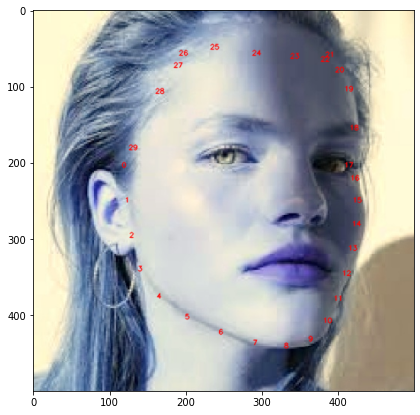

In [51]:
for idx, point in enumerate(face):
    #disp = cv2.circle(rgb_image,tuple(point),3,(255,0,0))
    disp = cv2.putText(image, str(idx), tuple(point), font, 0.3, (255, 0, 0), 1, cv2.LINE_AA)
    
plt.figure(figsize= (14,7))
plt.imshow(disp)

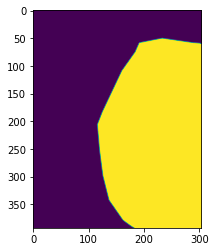

In [57]:
#img = cv2.imread('odd_images/img_10.jpeg')
#pts = np.array(landmarks[0:17])
rect = cv2.boundingRect(face)
x,y,w,h = rect
cropped = rgb_image[y:y+h,x:x+w].copy()

pts = pts -pts.min(axis = 0)

mask = np.zeros(cropped.shape[:2],np.uint8)
cv2.drawContours(mask, [face], -1, (255,255,255), -1, cv2.LINE_AA)

dst = cv2.bitwise_and(cropped,cropped,mask= mask)

bg = np.ones_like(cropped, np.uint8)*255
cv2.bitwise_not(bg,bg,mask = mask)
dst2 = bg+dst


#plt.imshow(cropped)
plt.imshow(mask)
#plt.imshow(dst)
#plt.imshow(dst2)
#plt.imshow(rgb_image)

In [58]:
face

array([[116, 206],
       [120, 252],
       [126, 298],
       [137, 342],
       [162, 378],
       [199, 405],
       [243, 425],
       [288, 439],
       [329, 443],
       [361, 434],
       [380, 410],
       [394, 381],
       [405, 348],
       [413, 315],
       [418, 283],
       [419, 252],
       [416, 223],
       [408, 206],
       [415, 157],
       [408, 106],
       [396,  81],
       [383,  61],
       [377,  67],
       [337,  63],
       [287,  59],
       [232,  51],
       [191,  59],
       [184,  75],
       [160, 109],
       [125, 183]])

4.568654043253652


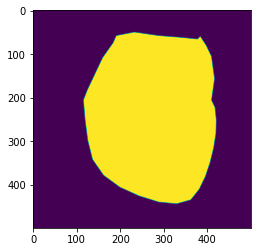

In [20]:
img = cv2.cvtColor(cv2.imread('odd_images/img_10.jpeg'),cv2.COLOR_BGR2GRAY)

#Create a black mask
mask = np.zeros(img.shape[0:2], dtype = np.uint8)

points = np.array(face)

#Trace contours on the mask in the shape of face
cv2.drawContours(mask, [points], -1,(255,255,255),-1,cv2.LINE_AA)


res = cv2.bitwise_and(img,img,mask=mask)
rect = cv2.boundingRect(points)
cropped = res[rect[1]:rect[1]+rect[3], rect[0]:rect[0]+rect[2]]
wbg = np.ones_like(img, np.uint8)*255
cv2.bitwise_not(wbg,wbg,mask=mask)
dat = wbg+res
print((np.sum(res >= 230)/np.sum(mask>=230)*100))
#plt.imshow(cropped)
plt.imshow(mask)

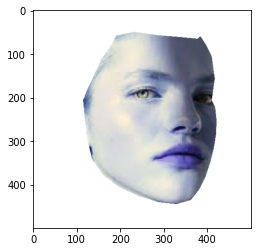

In [7]:
plt.imshow(dat)

In [41]:
def detect_oexposurev2(filepath,white_thresh, thresh_pct_limit):
    bbox = []
    flag = 0
    #Load image
    image = cv2.imread(filepath)
    img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    
    #Detect Face
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    image, rects = fd.detect_face(gray, cv2.imread(filepath))
    landmarks = fd.detect_landmarks(rects,gray,image)
    
    #Specify points for face boundary
    lower_part = landmarks[0:17]
    upper_part = np.array([landmarks[78],landmarks[74],landmarks[79], landmarks[73], 
                           landmarks[72], landmarks[80],landmarks[71], landmarks[70], landmarks[69], 
                           landmarks[68], landmarks[76],landmarks[75], landmarks[77]])
    face = np.array(np.concatenate((lower_part,upper_part)))
    
    #Create a black mask
    mask = np.zeros(img.shape[0:2], dtype = np.uint8)
    points = np.array(face)
    
    #Trace contours on the mask in the shape of face
    cv2.drawContours(mask, [points], -1,(255,255,255),-1,cv2.LINE_AA)
    res = cv2.bitwise_and(gray,gray,mask=mask)
    rect = cv2.boundingRect(points)
    cropped = res[rect[1]:rect[1]+rect[3], rect[0]:rect[0]+rect[2]]
    thresh_pct=(np.sum(res >= white_thresh)/np.sum(mask>=white_thresh)*100)
    #plt.imshow(cropped)
    #plt.imshow(res)
    if thresh_pct> thresh_pct_limit:
        flag=1
    return thresh_pct,flag 

In [42]:
import os

files=os.listdir('odd_images')
for file in files:
    print('============',file)
    if file!='img_6.jpg':
        print(detect_oexposurev2(os.path.join('odd_images',file),220,22.1))
        #print(detect_oexposurev2(os.path.join('odd_images',file),235))

============ img_1.jpg
(74.40281947526432, 1)
============ img_10.jpeg
(31.77644504187778, 1)
============ img_2.jpg
(66.51234567901234, 1)
============ img_3.png
(22.47468461561439, 1)
============ img_4.jpg
(13.646942901313219, 0)
============ img_5.jpg
(22.714576885332527, 1)
============ img_6.jpg
============ img_7.jpg
(38.93789539338858, 1)
============ img_8.jpg
(3.9037992331822937, 0)
============ img_9.jpg
(35.31474820143885, 1)


In [43]:
files=os.listdir('good_images')
for file in files:
    print('=======',file)
    print(detect_oexposurev2(os.path.join('good_images',file),220,22.1))
    #print(detect_oexposurev2(os.path.join('good_images',file),235))

======= good_1.jpg
(4.895104895104895, 0)
======= good_10.png
(0.674818139606872, 0)
======= good_11.jpg
(22.011903900030056, 0)
======= good_12.jpg
(17.094387896990934, 0)
======= good_2.jpg
(14.598325745337053, 0)
======= good_3.jpg
(8.146303602613028, 0)
======= good_4.jpg
(0.0, 0)
======= good_5.png
(1.0201318046402457, 0)
======= good_6.jpeg
(0.005203184348821478, 0)
======= good_7.jpeg
(0.18432422278576124, 0)
======= good_8.jpg
(0.2518098835379289, 0)
======= good_9.png
(0.0, 0)


### Face Angles

In [28]:
import dlib
import numpy as np
import cv2
from imutils import face_utils
import math

In [48]:
def verify_angle(shape, rects):
    (lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
    (rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]
    # print(face_utils.FACIAL_LANDMARKS_IDXS[])
    # midPts = shape[39:42]
    # output = face_utils.visualize_facial_landmarks(image, shape)

    # from here
    endl = shape[45]
    endr = shape[36]
    nose = shape[27]
    # dY = endl[1] - endr[1]
    ll = endl[0] - nose[0]
    lr = nose[0] - endr[0]
    # print(ll, lr)
    distance_eye = lr - ll
    #print('Distance b/w center to reye - distance b/w center to leye', distance_eye)
    #if distance_eye < 0:
        #print('Head turned right')
    #else:
        #print('Head turned left')
    # to here is the change

    leftEyePts = shape[lStart:lEnd]
    rightEyePts = shape[rStart:rEnd]
    #print('Left Eye Points are: ',leftEyePts)
    print('Right Eye points are: ',rightEyePts)

    # jaw_line = shape[]
    # compute the center of mass for each eye
    leftEyeCenter = leftEyePts.mean(axis=0).astype("int")
    print('Left Eye Center = ',leftEyeCenter)
    rightEyeCenter = rightEyePts.mean(axis=0).astype("int")
    print('Right Eye Center =', rightEyeCenter)
    # compute the angle between the eye centroids
    dY = rightEyeCenter[1] - leftEyeCenter[1]
    dX = rightEyeCenter[0] - leftEyeCenter[0]
    angle = np.degrees(np.arctan2(dY, dX)) - 180
    print(angle)

    # check for angle of forehead

    # compute the center of mass for each eye
    headStart = shape[77]
    headend = shape[78]
    # compute the angle between the eye centroids
    dY = headend[1] - headStart[1]
    dX = headend[0] - headStart[0]
    headangle = np.degrees(np.arctan2(dY, dX)) - 180
    print('Head Angle= ',headangle)

    (lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["jaw"]
    # print(lStart, lEnd)
    jawpt = shape[lStart:lEnd + 1]
    # print(jawpt)
    # cv2.imshow(jawpt,"frame")
    # compute the center of mass for each eye
    jawpts = jawpt[0:int(len(jawpt) / 2)].mean(axis=0).astype("int")
    jawpts2 = jawpt[int(len(jawpt) / 2):].mean(axis=0).astype("int")
    # compute the angle between the eye centroids
    dY = jawpts2[1] - jawpts[1]
    dX = jawpts2[0] - jawpts[0]
    jawangle = np.degrees(np.arctan2(dY, dX)) - 180
    print('Jaw angle = ',jawangle)
    endl = shape[13]
    endr = shape[36]
    nose = shape[30]
    # dY = endl[1] - endr[1]
    ll = endl[0] - nose[0]
    lr = nose[0] - endr[0]
    print(ll, lr)
    distance_cheeks = lr - ll
    print('',distance_cheeks)

    angle_res = {}
    # conditions to validate the angles
    if 0.0 <= abs(angle) <= 2.5 or 356.0 <= abs(angle) <= 360.0 or abs(distance_eye) < 15:
        angle_res['eye'] = 'Passed'
    else:
        angle_res['eye'] = 'Failed'

    if 176.0 <= abs(headangle) <= 184.0:
        angle_res['head'] = 'Passed'

    else:
        angle_res['head'] = 'Failed'

    if 185.0 <= abs(jawangle) <= 194.0 or abs(distance_cheeks) < 75:
        angle_res['jaw'] = 'Passed'
    else:
        angle_res['jaw'] = 'Failed'
    return angle_res

In [59]:
def face_orientation(frame, landmarks):
    size = frame.shape #(height, width, color_channel)

    image_points = np.array([
                            tuple(landmarks[30]),     # Nose tip
                            tuple(landmarks[8]),   # Chin
                            tuple(landmarks[45]),     # Left eye left corner
                            tuple(landmarks[36]),     # Right eye right corne
                            tuple(landmarks[54]),     # Left Mouth corner
                            tuple(landmarks[48])      # Right mouth corner
                        ], dtype="double")

    

                        
    model_points = np.array([
                            (0.0, 0.0, 0.0),             # Nose tip
                            (0.0, -330.0, -65.0),        # Chin
                            (-165.0, 170.0, -135.0),     # Left eye left corner
                            (165.0, 170.0, -135.0),      # Right eye right corne
                            (-150.0, -150.0, -125.0),    # Left Mouth corner
                            (150.0, -150.0, -125.0)      # Right mouth corner                         
                        ])

    # Camera internals
 
    center = (size[1]/2, size[0]/2)
    focal_length = center[0] / np.tan(60/2 * np.pi / 180)
    camera_matrix = np.array(
                         [[focal_length, 0, center[0]],
                         [0, focal_length, center[1]],
                         [0, 0, 1]], dtype = "double"
                         )

    dist_coeffs = np.zeros((4,1)) # Assuming no lens distortion
    (success, rotation_vector, translation_vector) = cv2.solvePnP(model_points, image_points,
                                                                  camera_matrix, 
                                                                  dist_coeffs, 
                                                                  flags=cv2.cv2.SOLVEPNP_ITERATIVE)

    
    axis = np.float32([[500,0,0], 
                          [0,500,0], 
                          [0,0,500]])
                          
    imgpts, jac = cv2.projectPoints(axis, rotation_vector, translation_vector, camera_matrix, dist_coeffs)
    modelpts, jac2 = cv2.projectPoints(model_points, rotation_vector, translation_vector, camera_matrix, dist_coeffs)
    rvec_matrix = cv2.Rodrigues(rotation_vector)[0]

    proj_matrix = np.hstack((rvec_matrix, translation_vector))
    eulerAngles = cv2.decomposeProjectionMatrix(proj_matrix)[6] 

    
    pitch, yaw, roll = [math.radians(_) for _ in eulerAngles]


    pitch = math.degrees(math.asin(math.sin(pitch)))
    roll = -math.degrees(math.asin(math.sin(roll)))
    yaw = math.degrees(math.asin(math.sin(yaw)))
    
    #print('Pitch = ',pitch)
    #print('Yaw = ',yaw)
    #print('Roll = ', roll)
    return pitch


(42, 48)
(36, 42)
81
Distance b/w center to reye - distance b/w center to leye -10
Head turned right
Left Eye Points are:  [[351 149]
 [359 146]
 [368 148]
 [376 152]
 [367 154]
 [358 152]]
Right Eye points are:  [[296 140]
 [303 137]
 [311 138]
 [317 144]
 [309 145]
 [301 143]]
Left Eye Center =  [363 150]
Right Eye Center = [306 141]
-351.0273733851036
Head Angle=  -171.55680907082336
Jaw angle =  -177.90474743537615
69 27
-42
{'eye': 'Passed', 'head': 'Failed', 'jaw': 'Passed'}


24.24877477252458

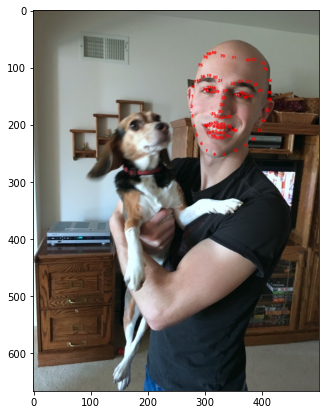

In [62]:
bbox = []
#filepath = 'face_angles/profile2.jpeg'
#filepath = 'static/Screen_Shot_2020-05-12_at_9.16.13_pm.png'
filepath = 'static/example_02.jpg'
image = cv2.imread(filepath)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
image, rects = fd.detect_face(gray, cv2.imread(filepath))

bbox.append(rects[0].left())
bbox.append(rects[0].top())
bbox.append(rects[0].right())
bbox.append(rects[0].bottom())

landmarks = fd.detect_landmarks(rects,gray,image)
print(face_utils.FACIAL_LANDMARKS_IDXS["left_eye"])
print(face_utils.FACIAL_LANDMARKS_IDXS["right_eye"])



font = cv2.FONT_HERSHEY_SIMPLEX
print(len(landmarks))
for idx, point in enumerate(landmarks):
    #disp = cv2.circle(rgb_image,tuple(point),3,(255,0,0))
    disp = cv2.putText(rgb_image, str(idx), tuple(point), font, 0.2, (255, 0, 0), 1, cv2.LINE_AA)
plt.figure(figsize= (14,7))
plt.imshow(disp)

angles = verify_angle(landmarks, rects)
print(angles)
face_orientation(image, landmarks)

In [58]:
#Test over multiple files

path = 'static'
files = os.listdir(path)
correct_count = 0
wrong_count = 0
valid_count=0

for file in files:
    filepath = os.path.join(path, file)
    image = cv2.imread(filepath)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    image, rects = fd.detect_face(gray, cv2.imread(filepath))
    
    if(len(rects) == 1):
        valid_count+=1
        bbox.append(rects[0].left())
        bbox.append(rects[0].top())
        bbox.append(rects[0].right())
        bbox.append(rects[0].bottom())
        
        landmarks = fd.detect_landmarks(rects,gray,image)
        pitch = face_orientation(image, landmarks)
        
        if(abs(pitch)>15):
            print('Error: Filename ',file)
            print(pitch)
            wrong_count+=1
            
        else:
            correct_count += 1
            
print('Total face count = ', valid_count)
print('Total errors = ', wrong_count)
print('Total images passed = ', correct_count)

Landmarks 30 =  (230, 193)
Error: Filename  1_1590388380.jpeg
18.843058255518848
Landmarks 30 =  (252, 376)
Landmarks 30 =  (225, 447)
Landmarks 30 =  (228, 259)
Error: Filename  Screen_Shot_2020-05-12_at_9.11.10_pm.png
19.230287666382036
Landmarks 30 =  (269, 418)
Landmarks 30 =  (217, 129)
Landmarks 30 =  (246, 119)
Landmarks 30 =  (317, 141)
Landmarks 30 =  (269, 419)
Landmarks 30 =  (1212, 719)
Landmarks 30 =  (1215, 717)
Landmarks 30 =  (306, 129)
Landmarks 30 =  (188, 352)
Error: Filename  image4.jpg
57.115923610087464
Landmarks 30 =  (246, 119)
Landmarks 30 =  (327, 293)
Landmarks 30 =  (216, 129)
Landmarks 30 =  (159, 131)
Error: Filename  Jeannette_Ceja-_Head_Shot_2018_0.jpg
23.244328589168074
Landmarks 30 =  (252, 376)
Landmarks 30 =  (243, 342)
Landmarks 30 =  (258, 370)
Landmarks 30 =  (398, 169)
Landmarks 30 =  (300, 311)
Landmarks 30 =  (249, 184)
Error: Filename  27_1590193145.png
26.908429313934985
Landmarks 30 =  (122, 323)
Error: Filename  imag1.JPEG
20.98670049785696

In [56]:
len(files)

61

## Checking preprocessing for image inference

In [11]:
import cv2
import matplotlib.pyplot as plt
import dlib
import numpy as np
detector = dlib.get_frontal_face_detector()
bbox = []

filepath = 'static/Screen_Shot_2020-05-12_at_9.03.41_pm.png'
image = cv2.imread(filepath)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rects = detector(image_gray,1)
bbox.append(rects[0].left())
bbox.append(rects[0].top())
bbox.append(rects[0].right())
bbox.append(rects[0].bottom())

face = image_rgb[bbox[1]:bbox[3], bbox[0]:bbox[2]]

img = cv2.resize(face, (224,224))
img = np.asarray(img)
img = img/255
img = np.expand_dims(img,axis = 0)
print(img.shape)

#plt.imshow(face)
#plt.imshow(img)

(1, 224, 224, 3)
